In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
dataset = pd.read_csv("/content/all_kindle_revieww.csv")
dataset

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000


In [ ]:
dataset.shape


(12000, 11)

In [ ]:
dataset.keys()


Index(['Unnamed: 0.1', 'Unnamed: 0', 'asin', 'helpful', 'rating', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary',
       'unixReviewTime'],
      dtype='object')

In [ ]:
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
5,5,3744,B0021L9YDK,"[6, 6]",5,Aislinn is a little girl with big dreams. Afte...,"12 7, 2009",A3J5NN6MJK4M4A,"Aubrie A. Dionne ""Fantasy, Sci Fi Author""",A story of a little girl with big dreams.,1260144000
6,6,13641,B0038NN38W,"[1, 1]",2,This has the makings of a good story... unfort...,"08 18, 2011",A531QY5K7JVXI,Chicano,This story has potential but ultimately disapp...,1313625600
7,7,4448,B002AJ7X2C,"[1, 1]",4,I got this because I like collaborated short s...,"03 8, 2010",AN8ELR6AHMMQ,"Jessss ""I read to find stories that inspire m...",Good thriller,1268006400
8,8,2797,B001L5T22U,"[0, 0]",5,"Loved this book, I am hooked on this series an...","09 30, 2013",AMSWCFSQ8SLK9,Amazon Customer,Loved it!,1380499200
9,9,5294,B002F3PPVE,"[0, 1]",4,"And that's a good thing. Short, sweet tease th...","07 29, 2009",AB53C7GYZHYIE,"A. Williams ""blkkat""",I was scared...,1248825600


In [ ]:
# Dimensions of dataset
print(" dimensions are:",format(dataset.shape))

 dimensions are: (12000, 11)


In [ ]:
# Information of cancer dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         12000 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


# Cleaning  Of Data Set
**bold text**

In [ ]:
# Count the number of empty values in each column
dataset.isna().sum()

Unnamed: 0.1       0
Unnamed: 0         0
asin               0
helpful            0
rating             0
reviewText         0
reviewTime         0
reviewerID         0
reviewerName      38
summary            0
unixReviewTime     0
dtype: int64

In [ ]:
dataset["reviewerName"]

0                               Ridley
1                         Holly Butler
2                              Merissa
3                           Cleargrace
4                             Rjostler
                     ...              
11995                    lisa jon jung
11996                          TerryLP
11997                          hwilson
11998    Allison A. Slater "Gryphon50"
11999                        Dafna Yee
Name: reviewerName, Length: 12000, dtype: object

we don't need review name column for our model , so **we** rests it as it is

In [ ]:
dataset = dataset.drop(["reviewerName"], axis = 1)
dataset = dataset.drop(["Unnamed: 0.1"], axis = 1)
dataset = dataset.drop(["Unnamed: 0","asin","helpful","reviewTime","reviewerID","summary","unixReviewTime"], axis = 1,)
# # dataset = dataset.drop(["reviewerName"], axis = 1)
# # dataset = dataset.drop(["reviewerName"], axis = 1)
# # dataset = dataset.drop(["reviewerName"], axis = 1)
# # dataset = dataset.drop(["reviewerName"], axis = 1)








In [ ]:
dataset.head()


,rating,reviewText
0,3,"Jace Rankin may be short, but he's nothing to ..."
1,5,Great short read. I didn't want to put it dow...
2,3,I'll start by saying this is the first of four...
3,3,Aggie is Angela Lansbury who carries pocketboo...
4,4,I did not expect this type of book to be in li...


In [ ]:

dataset.isna().sum()

rating        0
reviewText    0
dtype: int64

In [ ]:
# Numerical distribution of data
print(dataset.describe())

             rating
count  12000.000000
mean       3.250000
std        1.421619
min        1.000000
25%        2.000000
50%        3.500000
75%        4.250000
max        5.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rating      12000 non-null  int64 
 1   reviewText  12000 non-null  object
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


###  OUR DATASET IS PREPRED FOR ANALYSIS
###  Analyzing 'rating' column

In [ ]:
print(f"Rating value count: \n{dataset['rating'].value_counts()}")

Rating value count: 
5    3000
4    3000
3    2000
2    2000
1    2000
Name: rating, dtype: int64


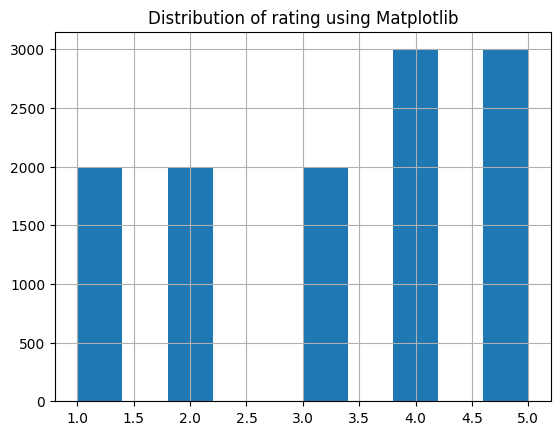

In [ ]:
# PLotting Rating histogram

dataset.rating.hist()
plt.title("Distribution of rating using Matplotlib")
plt.show()

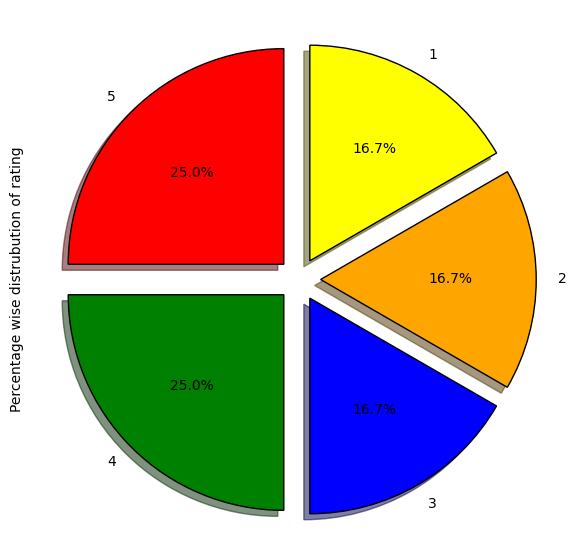

In [ ]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = dataset['rating'].value_counts()/dataset.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")


## Converting thr rating column as 0 - 1  value form

In [ ]:
#converting rating to 0 and 1 from 1-5
dataset["rating"] = dataset["rating"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1
dataset


,rating,reviewText
0,0,"Jace Rankin may be short, but he's nothing to ..."
1,0,Great short read. I didn't want to put it dow...
2,0,I'll start by saying this is the first of four...
3,0,Aggie is Angela Lansbury who carries pocketboo...
4,0,I did not expect this type of book to be in li...
...,...,...
11995,0,Valentine cupid is a vampire- Jena and Ian ano...
11996,0,I have read all seven books in this series. Ap...
11997,0,This book really just wasn't my cuppa. The si...
11998,1,"tried to use it to charge my kindle, it didn't..."


In [ ]:
import re
clean = re.compile("<>.*?")
re.sub(clean," ",dataset.iloc[2].reviewText)

"I'll start by saying this is the first of four books so I wasn't expecting it to &#34;conclude&#34;. It centers on 3 children, Alex and his younger brother Argus, and Alex's friend, Sapphire. They find a name on a bus map that they can't find and so the mystery starts. Well written with good character development although lots of room still for more.It's quite a short book so I will be moving onto book 2 swiftly."

In [ ]:
# removing Punctuation
def clean(text):
  clean = re.compile("<>.*?")
  return re.sub(clean," ",text)

dataset["reviewText"] =dataset["reviewText"].apply(clean)
dataset

,rating,reviewText
0,0,"Jace Rankin may be short, but he's nothing to ..."
1,0,Great short read. I didn't want to put it dow...
2,0,I'll start by saying this is the first of four...
3,0,Aggie is Angela Lansbury who carries pocketboo...
4,0,I did not expect this type of book to be in li...
...,...,...
11995,0,Valentine cupid is a vampire- Jena and Ian ano...
11996,0,I have read all seven books in this series. Ap...
11997,0,This book really just wasn't my cuppa. The si...
11998,1,"tried to use it to charge my kindle, it didn't..."


In [ ]:
# lowering the text of the review
def covert_lower(text):
   return text.lower()
dataset["reviewText"] =dataset["reviewText"].apply(covert_lower)
dataset

,rating,reviewText
0,0,"jace rankin may be short, but he's nothing to ..."
1,0,great short read. i didn't want to put it dow...
2,0,i'll start by saying this is the first of four...
3,0,aggie is angela lansbury who carries pocketboo...
4,0,i did not expect this type of book to be in li...
...,...,...
11995,0,valentine cupid is a vampire- jena and ian ano...
11996,0,i have read all seven books in this series. ap...
11997,0,this book really just wasn't my cuppa. the si...
11998,1,"tried to use it to charge my kindle, it didn't..."


In [ ]:
# # function to remove special characters
def remove_special(text):
  x = ""
  for i in text:
      if i.isalnum():
          x = x + i
      else:
          x = x + " "
  return x


dataset["reviewText"] = dataset["reviewText"].apply(remove_special)
dataset
# PUNCT_TO_REMOVE = string.punctuation
# def remove_punctuation(text):
#     """custom function to remove the punctuation"""
#     return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# data["reviewText"] = data["reviewText"].apply(lambda text: remove_punctuation(text))
# data.head()

,rating,reviewText
0,0,jace rankin may be short but he s nothing to ...
1,0,great short read i didn t want to put it dow...
2,0,i ll start by saying this is the first of four...
3,0,aggie is angela lansbury who carries pocketboo...
4,0,i did not expect this type of book to be in li...
...,...,...
11995,0,valentine cupid is a vampire jena and ian ano...
11996,0,i have read all seven books in this series ap...
11997,0,this book really just wasn t my cuppa the si...
11998,1,tried to use it to charge my kindle it didn t...


In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def remove_stopwords(text):
    x = []
    for i in text.split():
        if i not in stopwords.words("english"):
            x.append(i)
    y = x[:]
    x.clear()
    return y


In [ ]:
dataset["reviewText"] = dataset["reviewText"].apply(remove_stopwords)


In [ ]:
dataset

,rating,reviewText
0,0,"[jace, rankin, may, short, nothing, mess, man,..."
1,0,"[great, short, read, want, put, read, one, sit..."
2,0,"[start, saying, first, four, books, expecting,..."
3,0,"[aggie, angela, lansbury, carries, pocketbooks..."
4,0,"[expect, type, book, library, pleased, find, p..."
...,...,...
11995,0,"[valentine, cupid, vampire, jena, ian, another..."
11996,0,"[read, seven, books, series, apocalyptic, adve..."
11997,0,"[book, really, cuppa, situation, man, capturin..."
11998,1,"[tried, use, charge, kindle, even, register, c..."


In [ ]:
# perform strmming
from nltk.stem.porter import PorterStemmer


In [ ]:
y = []  # Initialize a list outside the function definition

def stem_word(text):
    for i in text:
        y.append(ps.stem(i))  # Assuming `ps` is your stemmer object
    z = y[:]
    y.clear()
    return z


In [ ]:
dataset["reviewText"] = dataset["reviewText"].apply(stem_word)

NameError: name 'ps' is not defined

In [ ]:
dataset

,rating,reviewText
0,0,"[jace, rankin, may, short, noth, mess, man, ha..."
1,0,"[great, short, read, want, put, read, one, sit..."
2,0,"[start, say, first, four, book, expect, 34, co..."
3,0,"[aggi, angela, lansburi, carri, pocketbook, in..."
4,0,"[expect, type, book, librari, plea, find, pric..."
...,...,...
11995,0,"[valentin, cupid, vampir, jena, ian, anoth, va..."
11996,0,"[read, seven, book, seri, apocalypt, adventur,..."
11997,0,"[book, realli, cuppa, situat, man, captur, wom..."
11998,1,"[tri, use, charg, kindl, even, regist, charg, ..."


In [ ]:
# join back

def join_back(list_input):
    return " ".join(list_input)

In [ ]:
dataset["reviewText"] = dataset["reviewText"].apply(join_back)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(dataset["reviewText"]).toarray()

In [ ]:
X.shape

(12000, 20107)

In [ ]:
X[0].max()

7

In [ ]:
y = dataset.iloc[:,-1].values

In [ ]:
dataset

,rating,reviewText
0,0,jace rankin may short noth mess man haul saloo...
1,0,great short read want put read one sit sex sce...
2,0,start say first four book expect 34 conclud 34...
3,0,aggi angela lansburi carri pocketbook instead ...
4,0,expect type book librari plea find price right
...,...,...
11995,0,valentin cupid vampir jena ian anoth vampir fi...
11996,0,read seven book seri apocalypt adventur one fa...
11997,0,book realli cuppa situat man captur woman work...
11998,1,tri use charg kindl even regist charg complet ...


In [ ]:
y.shape

(12000,)

In [ ]:
y[0]

'jace rankin may short noth mess man haul saloon undertak know famou bounti hunter oregon 1890 shot man saloon finish year long quest aveng sister murder tri figur next snotti nose farm boy rescu gang bulli offer money kill man forc ranch reluctantli agr bring man justic kill outright first need tell sister widow news kyla kyle springer bailey ride trail sleep ground past month tri find jace want reveng man kill husband took ranch amongst crime keen detour jace want take realiz option hide behind boy persona best tri keep pace confront along way get shot jace discov kyle kyla come clean whole reason need scoundrel dead hope still help book share touch moment slow bloom romanc kyla find good reason fear men hide behind boy persona watch jace slowli pull shell help conquer fear endear pain real deepli root disappear face sexi neither understand aver marriag magic disappear round nooki would man drift town town entir adult life man kill fair share men along way feel make good husband fath

In [ ]:
# X,y
#Training set
#Test Set(already kwon the result)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(9600, 20107)

In [ ]:
X_test.shape

(2400, 20107)

In [ ]:
y_train.shape

(9600,)

In [ ]:
y_test.shape

(2400,)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

In [ ]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)


In [ ]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [ ]:
y_test.shape

In [ ]:
y_pred1.shape

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Gaussian",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred1))
print("Bernaulli",accuracy_score(y_test,y_pred1))